# Linear regression

Gradient descent

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import time
import pylab as pl
from IPython import display

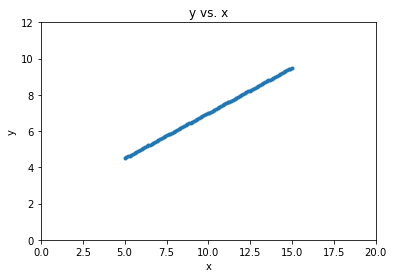

In [2]:
x = np.linspace(5,15,100)
m, c = .5, 2
y = m * x + c

plt.title('y vs. x')
plt.xlabel('x')
plt.ylabel('y')
plt.axis([0,20,0,12])
plt.plot(x,y,'.')

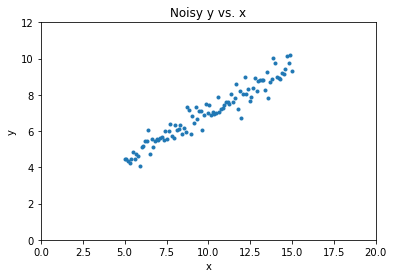

In [3]:
mu, sigma, n = 0, .4, len(y)
y = y + np.random.normal(mu, sigma, n)

plt.title('Noisy y vs. x')
plt.xlabel('x')
plt.ylabel('y')
plt.axis([0,20,0,12])
plt.plot(x,y,'.')

**Loss functions**

$J(\Theta) = \sum_{i=1}^n (y_i - f(x_i))^2$

We are interested in linear regression, so we set $f(x) = \theta_1 + \theta_2 x$.

$J(\Theta) = \sum_{i=1}^n (y_i - \theta_1 - \theta_2 x_i)^2$.  Here $\Theta = \left[\theta_1, \theta_2\right]^T$

We can also write the above relationship in vector form

$J(\Theta) = \left( \mathbf{y} - \mathbf{X} \Theta \right)^T \left( \mathbf{y} - \mathbf{X} \Theta \right)$

**Solution**

We can solve for $\Theta$ using by setting $\frac{\partial J(\Theta)}{\partial \Theta}$ to zero.

## Using vector notation

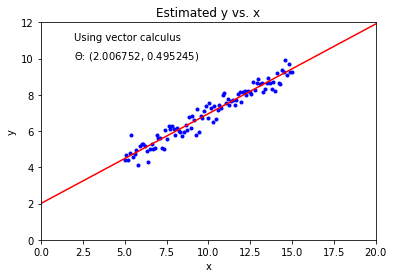

In [4]:
def linear_regression_vector_calculus(x, y):
    X = np.ones([len(x), 2])
    X[:,1] = x
    Y = np.ones([len(y), 1])
    Y[:,0] = y

    XtX = np.dot(X.T, X)
    XtY = np.dot(X.T, Y)

    theta = np.dot(np.linalg.inv(XtX), XtY)
    return theta[0], theta[1]

t0, t1 = linear_regression_vector_calculus(x, y)
y_estimate = t0 + t1*np.linspace(0,20,100)

plt.title('Estimated y vs. x')
plt.text(2, 11, 'Using vector calculus')
plt.text(2, 10, '$\Theta$: (%f, %f)' % (t0, t1))
plt.axis([0,20,0,12])
plt.xlabel('x')
plt.ylabel('y')
plt.plot(x,y,'b.')
plt.plot(np.linspace(0,20,100),y_estimate,'r')

## Without using vector notation - 1D case

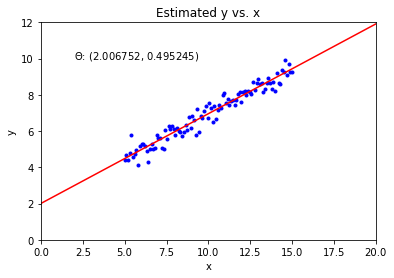

In [5]:
def linear_regression(x, y):
    mean_x = np.mean(x)
    mean_y = np.mean(y)

    xx = np.multiply(x, x - mean_x)
    yy = np.multiply(x, y - mean_y)

    t1 = np.sum(yy) / np.sum(xx)
    t0 = mean_y - t1 * mean_x

    return t0, t1

t0, t1 = linear_regression(x, y)
y_estimate2 = t0 + t1*np.linspace(0,20,100)

plt.title('Estimated y vs. x')
plt.text(2, 10, '$\Theta$: (%f, %f)' % (t0, t1))
plt.axis([0,20,0,12])
plt.xlabel('x')
plt.ylabel('y')
plt.plot(x,y,'b.')
plt.plot(np.linspace(0,20,100),y_estimate2,'r')

In [7]:
def compute_error(t1, t2, x, y):
    N = float(len(x))

    err = 0
    for i in range(0, len(x)):
        err = err + (y[i] - t1 - t2*x[i]) ** 2
    err = err / N    
    return err

In [8]:
def batch_gradient_descent(t1, t2, x, y, learningRate):
    dt1 = 0
    dt2 = 0
    N = float(len(x))
    for i in range(len(x)):
        dt1 += -(2/N) * (y[i] - t1 - t2*x[i]) 
        dt2 += -(2/N) * x[i] * (y[i] - t1 - t2*x[i])
        
        #print 'ff', i, dt1, dt2
        
    t1 = t1 - (learningRate * dt1)
    t2 = t2 - (learningRate * dt2)
    
    
    err = compute_error(t1, t2, x, y)
    
    return t1, t2, err

In [9]:
def online_gradient_descent(t1, t2, x, y, learningRate):
    N = float(len(x))
    for i in range(len(x)):
        dt1 = -(2/N) * (y[i] - t1 - t2*x[i]) 
        dt2 = -(2/N) * x[i] * (y[i] - t1 - t2*x[i])
        t1 = t1 - (learningRate * dt1)
        t2 = t2 - (learningRate * dt2)
    
    err = compute_error(t1, t2, x, y)
    
    return t1, t2, err

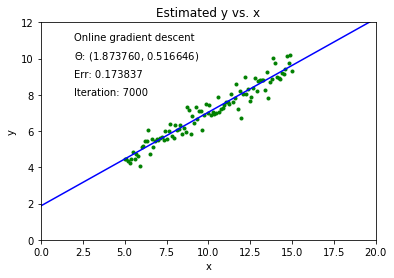

t1= 1.85612850094 t2= 0.518150153845
err= 0.173800900439
iterations= 7999


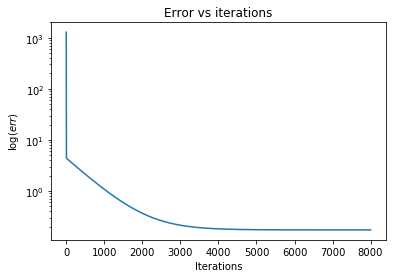

In [11]:
t1, t2 = 10, 10
learning_rate = 0.005 #, 0.1 #0.005
num_iterations = 8000
batch = False

errs = []

for i in range(num_iterations):
    if batch:
        t1, t2, err = batch_gradient_descent(t1, t2, x, y, learning_rate)        
    else:
        t1, t2, err = online_gradient_descent(t1, t2, x, y, learning_rate)

    errs.append(err)
    
    if i % 1000 == 0:
        y_estimate = t1 + t2*np.linspace(0,20,100)

        plt.title('Estimated y vs. x')
        if batch:
            plt.text(2, 11, 'Batch gradient descent')
        else:
            plt.text(2, 11, 'Online gradient descent')
            
        plt.text(2, 10, '$\Theta$: (%f, %f)' % (t1, t2))
        plt.text(2, 9, 'Err: %f' % err)
        plt.text(2, 8, 'Iteration: %d' % i)
        plt.xlabel('x')
        plt.ylabel('y')
        plt.axis([0, 20, 0, 12])
        plt.plot(x,y,'g.')
        plt.plot(np.linspace(0,20,100),y_estimate,'b')
        display.clear_output(wait=True)
        display.display(plt.gcf())
        time.sleep(0.1)
        plt.clf()
        
print 't1=', t1, 't2=', t2
print 'err=', err
print 'iterations=', i

plt.title('Error vs iterations')
plt.semilogy(np.linspace(1,len(errs),len(errs)), errs)
plt.xlabel('Iterations')
plt.ylabel('$\log(err)$')

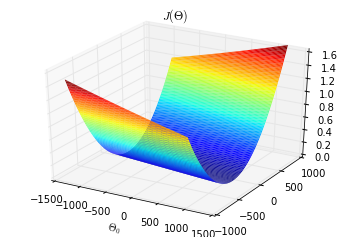

In [364]:
m_range = np.linspace(m-1115, m+1115, 100)
c_range = np.linspace(c-1115, c+1115, 100)
mm, cc = np.meshgrid(m_range, c_range)
z = np.zeros([len(m_range), len(c_range)])
for i in range(len(m_range)):
    for j in range(len(c_range)):
        z[i,j] = compute_error(mm[i,j], cc[i,j], x, y)   

from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.gca(projection = '3d')
jet = plt.get_cmap('jet')
plt.title('$J(\Theta)$')
plt.xlabel('$\Theta_1$')
plt.xlabel('$\Theta_0$')
plt.axis('equal')
surf = ax.plot_surface(mm, cc, z, rstride = 1, cstride = 1, cmap = jet, linewidth = 0)
ax.set_zlim3d(0, z.max())
plt.show()

# auto-mpg data

In [368]:
usecols = {0,1,2,3, 4,5,6}
converters = {3: lambda s: float(s.strip() != '?' or 0)}
auto_mpg = numpy.loadtxt('../datasets/regression/auto-mpg/auto-mpg.data', converters=converters, usecols=usecols)

68.0 455.0


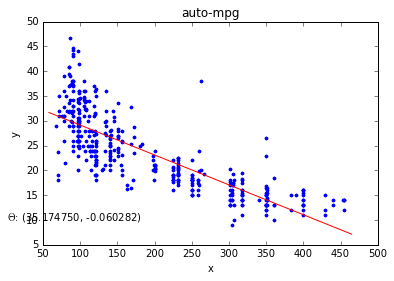

In [378]:
x = auto_mpg[:,2]
y = auto_mpg[:,0]

print np.min(x), np.max(x)

t0, t1 = linear_regression(x, y)

plt.title('auto-mpg')
plt.ylabel('mpg')
plt.xlabel('displacement')
plt.plot(x,y,'.')
y_estimate1 = t0 + t1*np.linspace(np.min(x)-10,np.max(x)+10,10)
plt.text(2, 10, '$\Theta$: (%f, %f)' % (t0, t1))
plt.xlabel('x')
plt.ylabel('y')
plt.plot(x,y,'b.')
plt.plot(np.linspace(np.min(x)-10,np.max(x)+10,10),y_estimate1,'r')